In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [3]:
df=pd.read_csv("fiat500.csv")
df

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700
...,...,...,...,...,...,...,...,...,...
1533,1534,sport,51,3712,115280,1,45.069679,7.704920,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.666870,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.413480,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.682270,5990


In [4]:
df.shape #returns no.of rows and columns

(1538, 9)

In [5]:
df.isna().sum()

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [6]:
co=df.drop(columns=['ID','model','lat','lon'])
co.corr()

,engine_power,age_in_days,km,previous_owners,price
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328
km,0.285495,0.833890,1.000000,0.097539,-0.859373
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000


In [7]:
df['model'].unique() #unique column values

array(['lounge', 'pop', 'sport'], dtype=object)

In [8]:
sports=df.loc[df['model']=="sport"]
print(sports.to_string())

        ID  model  engine_power  age_in_days      km  previous_owners        lat        lon  price
2        3  sport            74         4658  142228                1  45.503300  11.417840   4200
8        9  sport            73         4049   76000                1  45.548000  11.549470   5600
9       10  sport            51         3653   89000                1  45.438301  10.991700   6000
27      28  sport            51         3531  100000                1  40.976452  14.172280   4950
33      34  sport            51         3927  140000                2  40.755932  14.690190   5200
38      39  sport            51          790   43100                1  45.334080  11.376870   9950
40      41  sport            51         4139  119000                1  45.349319   7.742600   4890
48      49  sport            51         3684  160000                1  45.405472  10.278290   4900
49      50  sport            51         4596  107000                1  40.845901  14.369270   4300
51      52

In [9]:
pop=df.loc[df['model']=="pop"]
lounge=df.loc[df['model']=="lounge"]
print(pop.shape)
print(lounge.shape)

(358, 9)
(1094, 9)


In [10]:
sports.drop(columns=['ID','model','lat','lon','engine_power']).describe()

,age_in_days,km,previous_owners,price
count,86.000000,86.000000,86.000000,86.000000
mean,3310.372093,103382.802326,1.267442,6275.406977
std,1165.134994,43041.072473,0.602435,1916.322860
min,517.000000,6200.000000,1.000000,3800.000000
25%,3020.750000,72425.000000,1.000000,4892.500000
50%,3684.000000,102400.000000,1.000000,5800.000000
75%,4139.000000,129973.000000,1.000000,6900.000000
max,4658.000000,190000.000000,4.000000,10800.000000


In [11]:
lounge.drop(columns=['ID','model','lat','lon','engine_power']).describe()

,age_in_days,km,previous_owners,price
count,1094.000000,1094.000000,1094.000000,1094.000000
mean,1437.570384,46873.445155,1.117002,8949.486289
std,1203.670113,37051.887997,0.406966,1798.159691
min,366.000000,1232.000000,1.000000,2900.000000
25%,640.000000,18826.500000,1.000000,7800.000000
50%,790.000000,33105.500000,1.000000,9500.000000
75%,2192.000000,67000.000000,1.000000,10400.000000
max,4658.000000,235000.000000,4.000000,11100.000000


In [12]:
pop.drop(columns=['ID','model','lat','lon','engine_power']).describe()

,age_in_days,km,previous_owners,price
count,358.000000,358.000000,358.000000,358.000000
mean,1904.508380,61320.100559,1.108939,7987.349162
std,1238.086949,38277.729326,0.384400,1838.241284
min,366.000000,3000.000000,1.000000,2500.000000
25%,790.000000,30000.000000,1.000000,6900.000000
50%,1751.000000,54099.000000,1.000000,7999.500000
75%,2769.000000,85875.000000,1.000000,9500.000000
max,4658.000000,201000.000000,4.000000,11090.000000


In [13]:
x=sports.drop(columns=['ID','model','lat','lon','engine_power','price'])
y=sports['price']
x

,age_in_days,km,previous_owners
2,4658,142228,1
8,4049,76000,1
9,3653,89000,1
27,3531,100000,1
33,3927,140000,2
...,...,...,...
1498,1400,60000,1
1501,3774,161900,1
1504,4322,95000,1
1531,4505,127000,1


In [14]:
a=lounge.drop(columns=['ID','model','lat','lon','engine_power','price'])
b=lounge['price']
c=pop.drop(columns=['ID','model','lat','lon','engine_power','price'])
d=pop['price']

In [2]:
#import model
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression()
model.fit(x,y)
model1=LinearRegression()
model1.fit(a,b)
model2=LinearRegression()
model2.fit(c,d)

LinearRegression()

In [17]:
def price(tot,ty):
    prices=[]
    for i in range(tot):
        if ty=="sport" or ty=="lounge" or ty=="pop":
            print(f"Car {i+1} :")
            days=int(input("No. of Days old : "))
            kms=int(input("No. of Kilometers driven : "))
            prev=int(input("No. of Previous owners : "))
            if ty=="sport":
                prices.append(int(model.predict([[days,kms,prev]])[0]))
            elif ty=="lounge":
                prices.append(int(model1.predict([[days,kms,prev]])[0]))
            else:
                prices.append(int(model2.predict([[days,kms,prev]])[0]))
        else:
            print("Enter correct car type!!")
            break
        print()
    for i in range(len(prices)):
        print(f"Excepted price of Car {i+1} : $"+str(prices[i]))
n=int(input("Total no.of cars : "))
type=input("Enter car type (sport,lounge,pop) : ")
print()
price(n,type)

Total no.of cars :  1
Enter car type (sport,lounge,pop) :  sport



Car 1 :


No. of Days old :  50
No. of Kilometers driven :  40000
No. of Previous owners :  1



Excepted price of Car 1 : $10885


In [18]:
newdf=df.drop(columns=['ID','lat','lon','engine_power','price'])
newdf

,model,age_in_days,km,previous_owners
0,lounge,882,25000,1
1,pop,1186,32500,1
2,sport,4658,142228,1
3,lounge,2739,160000,1
4,pop,3074,106880,1
...,...,...,...,...
1533,sport,3712,115280,1
1534,lounge,3835,112000,1
1535,pop,2223,60457,1
1536,lounge,2557,80750,1


In [19]:
newdf1=pd.get_dummies(newdf,dtype=int)
newdf1

,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,882,25000,1,1,0,0
1,1186,32500,1,0,1,0
2,4658,142228,1,0,0,1
3,2739,160000,1,1,0,0
4,3074,106880,1,0,1,0
...,...,...,...,...,...,...
1533,3712,115280,1,0,0,1
1534,3835,112000,1,1,0,0
1535,2223,60457,1,0,1,0
1536,2557,80750,1,1,0,0


In [20]:
x1=newdf1
y1=df['price']
model3=LinearRegression()
model3.fit(x1,y1)

LinearRegression()

In [34]:
type=input("Enter car type (sport,lounge,pop) : ")
days=int(input("No. of Days old : "))
kms=int(input("No. of Kilometers driven : "))
prev=int(input("No. of Previous owners : "))
if type=="sport":
    print(f"Excepted price of {type} car  : $"+str(int(model3.predict([[days,kms,prev,0,0,1]])[0])))
elif type=="pop":
    print(f"Excepted price of {type} car  : $"+str(int(model3.predict([[days,kms,prev,0,1,0]])[0])))
elif type=="lounge":
    print(f"Excepted price of {type} car  : $"+str(int(model3.predict([[days,kms,prev,1,0,0]])[0])))
else:
    print("Enter correct car type!!")

Enter car type (sport,lounge,pop) :  sport
No. of Days old :  2190
No. of Kilometers driven :  70000
No. of Previous owners :  1


Excepted price of sport car  : $7842


In [3]:
#train test data
from sklearn.model_selection import train_test_split


In [104]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.33,shuffle=False)
print(x_train.shape)
print(x_test.shape)

(1030, 6)
(508, 6)


In [105]:
final=LinearRegression()
final.fit(x_train,y_train)
ans=final.predict(x_test)

In [106]:
type=input("Enter car type (sport,lounge,pop) : ")
days=int(input("No. of Days old : "))
kms=int(input("No. of Kilometers driven : "))
prev=int(input("No. of Previous owners : "))
if type=="sport":
    print(f"Excepted price of {type} car  : $"+str(int(final.predict([[days,kms,prev,0,0,1]])[0])))
elif type=="pop":
    print(f"Excepted price of {type} car  : $"+str(int(final.predict([[days,kms,prev,0,1,0]])[0])))
elif type=="lounge":
    print(f"Excepted price of {type} car  : $"+str(int(final.predict([[days,kms,prev,1,0,0]])[0])))
else:
    print("Enter correct car type!!")

Enter car type (sport,lounge,pop) :  gh
No. of Days old :  8483
No. of Kilometers driven :  444
No. of Previous owners :  3


Enter correct car type!!


In [107]:
y_pred=final.predict(x_test)
y_pred.shape

(508,)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
accuracy_score(y_pred>0,y_test>0)

1.0

In [110]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.15,shuffle=False)
final1=LinearRegression()
final1.fit(x_train,y_train)
ans1=final1.predict(x1_test)

In [4]:
import seaborn as sns
import matplotlib as plt

In [118]:
#graph between prediction and test
result=pd.DataFrame(columns=['KM','Price'])
result['KM']=x1_test['km']
result['Price']=ans1
result

,KM,Price
1307,58684,8854.220551
1308,35473,6835.984530
1309,37000,9727.896187
1310,29500,9551.390724
1311,34031,9859.071766
...,...,...
1533,115280,5716.733447
1534,112000,5694.015223
1535,60457,7670.019534
1536,80750,7383.160635


In [119]:
result1=pd.DataFrame(columns=['KM','Price'])
result1['KM']=x_test['km']
result1['Price']=ans
result1

,KM,Price
1030,91000,6681.773925
1031,110000,6965.711532
1032,33530,8434.679300
1033,26500,10015.755037
1034,56779,9498.465579
...,...,...
1533,115280,5716.733447
1534,112000,5694.015223
1535,60457,7670.019534
1536,80750,7383.160635


<Axes: xlabel='KM', ylabel='Price'>

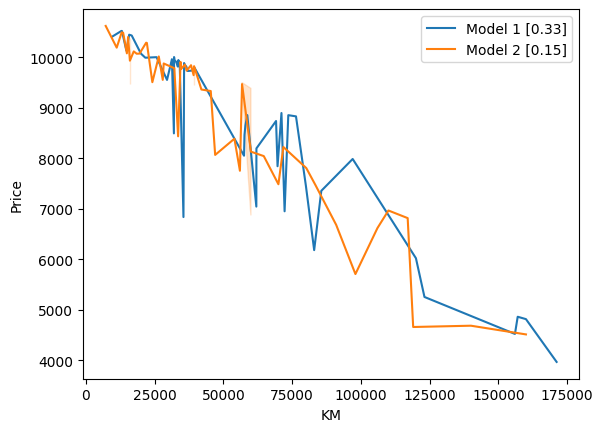

In [124]:
sns.lineplot(x='KM',y="Price",data=result.head(50),label="Model 1 [0.33]")
sns.lineplot(x='KM',y="Price",data=result1.head(50),label="Model 2 [0.15]")

In [44]:
df=pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [45]:
df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean(),inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [46]:
df['experience'].unique()

array([nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven'],
      dtype=object)

In [43]:
!pip install word2number

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5589 sha256=1c96b6d9bf22295bf851ecccb1cc2f86496e6d01a91a8b152493b63f02cd510b
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\cd\ef\ae\073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
df['experience']=df['experience'].fillna("zero")

In [48]:
from word2number import w2n
df['experience']=df['experience'].apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.000000,9,50000
1,0,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [49]:
df.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.241897,-0.29048,0.908017
test_score(out of 10),-0.241897,1.000000,0.13971,-0.002850
interview_score(out of 10),-0.290480,0.139710,1.00000,0.037820
salary($),0.908017,-0.002850,0.03782,1.000000


In [50]:
x=df.drop(columns=['salary($)'])
y=df['salary($)']
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.000000,9
1,0,8.000000,6
2,5,6.000000,7
3,2,10.000000,10
4,7,9.000000,6
5,3,7.000000,10
6,10,7.857143,7
7,11,7.000000,8


In [51]:
final1=LinearRegression()
final1.fit(x,y)

LinearRegression()

In [56]:
experience=int(input("Enter your Experience : "))
test=float(input("Enter your Test Score : "))
interview=int(input("Enter your Interview Score : "))
print("Excepted salary : $"+str(final1.predict([[experience,test,interview]])[0]))

Enter your Experience :  2
Enter your Test Score :  9
Enter your Interview Score :  6


Excepted salary : $53290.892559447646
